# 8x8 Bistable MEMS Switch Array

64 bistable single-comb-pair 1.75x switch cells arranged at **250 um pitch**
with routed POLY_MEMS interconnects.

Uses CCS bistable springs instead of folded springs for nonvolatile switching.

**Routing scheme:**
- **Per-cell stubs** (20 um): each anchor gets a short trace extending **away from cell center**
  - Upper CCS spring anchor → stub going UP
  - Lower CCS spring anchor → stub going DOWN
  - Right comb anchor → stub going RIGHT
  - Left comb anchor → stub going LEFT
- **Stiction-prevention anchors**: 10x10 um, 3-layer (POLY_TOP + POLY_MEMS + SI_FULL), one at each stub endpoint

In [1]:
import sys
sys.path.insert(0, "../../libraries")

from mcw_custom_optical_mems_pdk import PDK
PDK.activate()

from switch_array_bistable import make_switch_array_bistable, make_switch_cell_bistable_padless

## Single Padless Bistable Cell (unit element)

1.75x scaled switch cell with CCS bistable springs. No large pads —
the CCS spring's built-in multi-layer anchors serve as routing targets.

Cell size: 161.6 x 221.1 um  (pitch = 250 um)


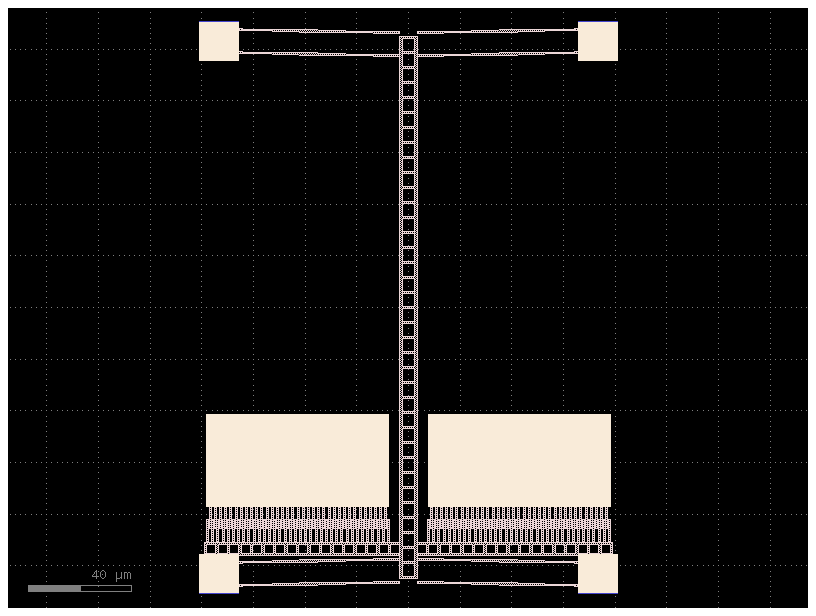

In [2]:
cell = make_switch_cell_bistable_padless()
bb = cell.dbbox()
print(f"Cell size: {bb.width():.1f} x {bb.height():.1f} um  (pitch = 250 um)")
cell.plot()

## Zoomed View (2x2 corner)

Small 2x2 array for detailed inspection of routing stubs and anchor
placement.

2x2 array: 457 x 522 um


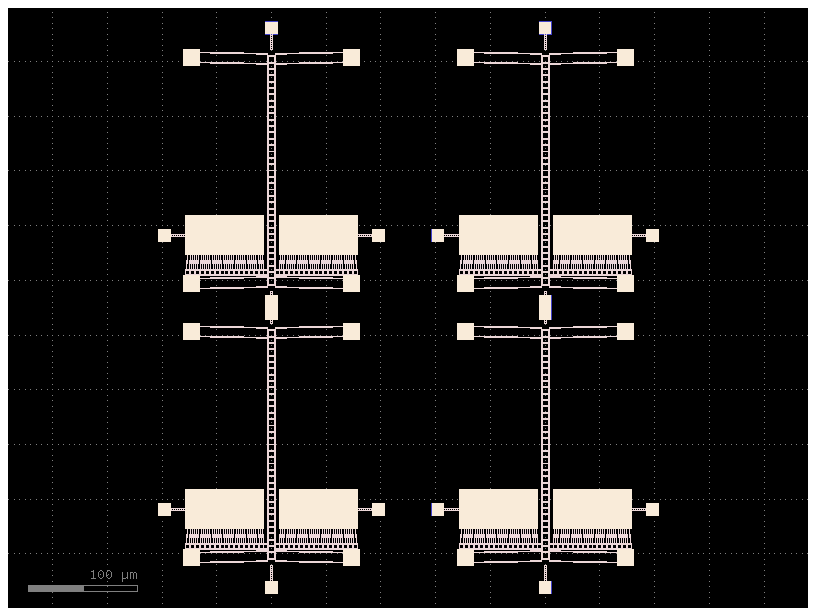

In [3]:
arr_2x2 = make_switch_array_bistable(nrows=2, ncols=2)
bb = arr_2x2.dbbox()
print(f"2x2 array: {bb.width():.0f} x {bb.height():.0f} um")
arr_2x2.plot()

## Full 8x8 Bistable Array

Array size: 1957 x 2022 um
  = 1.96 x 2.02 mm


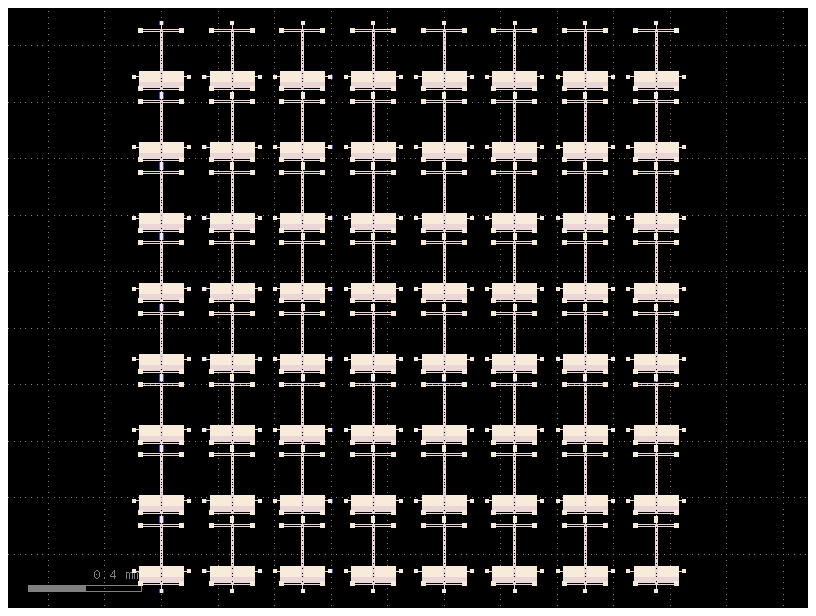

In [4]:
arr = make_switch_array_bistable()
bb = arr.dbbox()
print(f"Array size: {bb.width():.0f} x {bb.height():.0f} um")
print(f"  = {bb.width()/1000:.2f} x {bb.height()/1000:.2f} mm")
arr.plot()

## Size Comparison with Original Array

In [5]:
from switch_array import make_switch_array

arr_orig = make_switch_array()
bb_orig = arr_orig.dbbox()
bb_bist = arr.dbbox()

print(f"Original (folded spring): {bb_orig.width():.0f} x {bb_orig.height():.0f} um")
print(f"Bistable (CCS spring):    {bb_bist.width():.0f} x {bb_bist.height():.0f} um")
print(f"  Width delta:  {bb_bist.width() - bb_orig.width():+.0f} um")
print(f"  Height delta: {bb_bist.height() - bb_orig.height():+.0f} um")

Original (folded spring): 1957 x 2040 um
Bistable (CCS spring):    1957 x 2022 um
  Width delta:  +0 um
  Height delta: -18 um


## GDS Export

In [6]:
arr.write_gds("../../../layouts/switch_array_bistable_8x8.gds")
print("Exported to layouts/switch_array_bistable_8x8.gds")

Exported to layouts/switch_array_bistable_8x8.gds
